Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it
represent?

-> R square shows how accurate our model is using the ratio of error due to best fit line and error due to average line , its formula is 1 - error due to best fit line / error due to average line . It represents the accuracy of the model .

Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.

-> Adjusted R-squared is a variation of regular R-squared and it is used to determine the independent variable which is correlated to some other independent variable . It is more accurate as compared to regular R-squared.

Q3. When is it more appropriate to use adjusted R-squared?

-> When we have multiple feature or if we have feature that are correlated .

Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics
calculated, and what do they represent?

-> RMSE , MSE and MAE are used to calculate the total error present in the actual value and the predicted value , here the error are added by either taking square or considering the absolute value , so they represent the actual error and not the vector sum of the error .

Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in
regression analysis.

-> Advantages : gives us an idea about how much error our model gives
Disadvantage  : we cannot tell how accurate is our model based on their output .

Q6. Explain the concept of Lasso regularization. How does it differ from Ridge regularization, and when is
it more appropriate to use?

->Lasso regression is used to handle the prediction if the dataset is having independent variable that are weakly correlated to the target variable. wheareas ridge regression is used to avoid overfitting of the model.We can use the Lasso regularization if we have independent variables that are weakly correlated to the target variable.

Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an
example to illustrate.

-> It helps in deviating the value best fit line from the data points not following the general pattern that is followed by the other datapoints,thus avoiding overfitting.

          X          y
0  0.000000   6.490142
1  0.202020   4.989248
2  0.404040   7.751146
3  0.606061  10.781211
4  0.808081   5.913701
Ridge Regression R-squared: 0.0002489141906480974
Linear Regression R-squared: 0.0002489142020677404


C:\Users\jaide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\jaide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


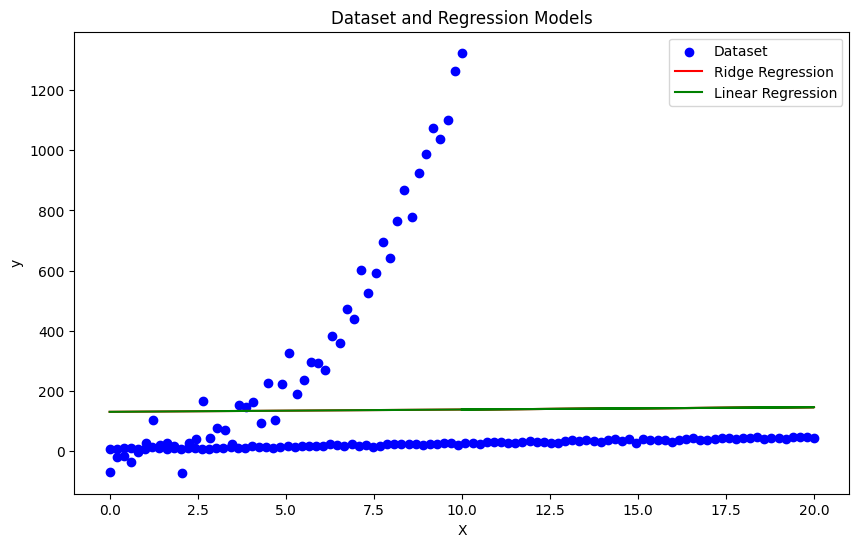

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Linear dataframe
np.random.seed(42)
linear_data = np.linspace(0, 20, 100)
linear_df = pd.DataFrame({'X': linear_data, 'y': 2 * linear_data + 5 + np.random.normal(0, 3, 100)})

# Cubic dataframe
cubic_data = np.linspace(0, 10, 50)
cubic_df = pd.DataFrame({'X': cubic_data, 'y': cubic_data**3 + 3 * cubic_data**2 + cubic_data + np.random.normal(0, 50, 50)})

# Interleave data points
merged_df = pd.concat([linear_df, cubic_df], axis=0, ignore_index=True, sort=False)

# Display merged dataframe
print(merged_df.head())

# Prepare features and target for Ridge model
X_ridge = merged_df[['X']]
y_ridge = merged_df['y']

# Prepare features and target for Linear model
X_linear = merged_df[['X']]
y_linear = merged_df['y']

# Create and train the Ridge regression model on the entire dataset
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_ridge, y_ridge)

# Create and train the Linear Regression model on the entire dataset
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)

# Predictions
y_pred_ridge = ridge_model.predict(X_ridge)
y_pred_linear = linear_model.predict(X_linear)

# Calculate R-squared for Ridge regression
r2_ridge = r2_score(y_ridge, y_pred_ridge)

# Calculate R-squared for Linear regression
r2_linear = r2_score(y_linear, y_pred_linear)

# Print the results
print(f'Ridge Regression R-squared: {r2_ridge}')
print(f'Linear Regression R-squared: {r2_linear}')

# Plot the dataset and regression models
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['X'], merged_df['y'], label='Dataset', color='blue')

# Plot Ridge regression
ridge_line = ridge_model.predict(np.array(merged_df['X']).reshape(-1, 1))
plt.plot(merged_df['X'], ridge_line, label='Ridge Regression', color='red')

# Plot Linear regression
linear_line = linear_model.predict(np.array(merged_df['X']).reshape(-1, 1))
plt.plot(merged_df['X'], linear_line, label='Linear Regression', color='green')

plt.title('Dataset and Regression Models')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best
choice for regression analysis.

-> We dont have much affect of the regularization and more computation power is required becuse of their more complex cost function.

Q9. You are comparing the performance of two regression models using different evaluation metrics.
Model A has an RMSE of 10, while Model B has an MAE of 8. Which model would you choose as the better
performer, and why? Are there any limitations to your choice of metric?

-> If the error value is mostly less than 1 than i will prefer mae as rmse in that case is too high , however if its not that case than i will prefer rmse as its the root value of mse , and the value of square increases drastically after 1 as compared to the linear function (mae). and adding them further increases the value of the error . Although we are taking square at the end but still we have squared and added the value.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions
y_pred_ridge = ridge_model.predict(X_ridge)
y_pred_linear = linear_model.predict(X_linear)

# Calculate RMSE for Ridge regression
rmse_ridge = np.sqrt(mean_squared_error(y_ridge, y_pred_ridge))

# Calculate MAE for Ridge regression
mae_ridge = mean_absolute_error(y_ridge, y_pred_ridge)

# Calculate RMSE for Linear regression
rmse_linear = np.sqrt(mean_squared_error(y_linear, y_pred_linear))

# Calculate MAE for Linear regression
mae_linear = mean_absolute_error(y_linear, y_pred_linear)

# Print the results
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression MAE: {mae_linear}')


Ridge Regression RMSE: 272.6442143538097
Ridge Regression MAE: 177.8386285757615
Linear Regression RMSE: 272.6442143522525
Linear Regression MAE: 177.83872963580814


Q10. You are comparing the performance of two regularized linear models using different types of
regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B
uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the
better performer, and why? Are there any trade-offs or limitations to your choice of regularization
method?

-> If I have more number of outliers than I will prefer model a wheareas if i have more number of feature that are strongly correlated to the target variable and on contrast I am having some variable having weak correlation with the target variable in the same dataset than I will use lasso regularization. 